### 1. Import Required Packages

In [1]:
import math
import json
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (

### 2. Read dataset from exported json file

In [2]:
df = pd.read_json('C:/Users/ASUS/BANGKIT/TokoLitik/data.json')
df["date"] = df["date"].dt.date

In [3]:
productFile = open("C:/Users/ASUS/BANGKIT/TokoLitik/product.json")
product = json.load(productFile)

transactionFile = open("C:/Users/ASUS/BANGKIT/TokoLitik/transaction.json")
transaction = json.load(transactionFile)

### 3. Data Preprocessing

In [4]:
#change date field into datetime format
df["date"] = pd.to_datetime(df["date"])

In [5]:
# change every data in date field as the first date of each month for plotting the monthly sales
df_temp = df.copy()
df_temp["date"] = df_temp["date"].dt.year.astype("str") + '-' + df["date"].dt.month.astype("str") + '-01'
df_temp['date'] = pd.to_datetime(df_temp['date'])
print("Total data for {} : {}".format(product["productName"], df_temp.shape[0]))

Total data for Keripik Bawang Yusri : 6364


#### - Change Daily Sales Data into Monthly Sales

In [6]:
# groupby date and sum the sales item
df_monthly = df_temp.copy()
df_monthly = df_monthly.groupby('date').daily_sales.sum().reset_index()
df_monthly.rename(columns={'daily_sales':'monthly_sales'}, inplace=True)
print("Total monthly data {}: {}".format(product["productName"], df_monthly.shape[0]))

# print all rows in dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df_monthly)

Total monthly data Keripik Bawang Yusri: 72
         date  monthly_sales
0  2015-01-01           7830
1  2015-02-01           7936
2  2015-03-01           7343
3  2015-04-01           8352
4  2015-05-01           7868
5  2015-06-01           6597
6  2015-07-01           6196
7  2015-08-01           5280
8  2015-09-01           4235
9  2015-10-01           2010
10 2015-11-01           1297
11 2015-12-01            681
12 2016-01-01          10626
13 2016-02-01           9562
14 2016-03-01          10579
15 2016-04-01          10181
16 2016-05-01          10394
17 2016-06-01           9174
18 2016-07-01           7710
19 2016-08-01           6613
20 2016-09-01           5243
21 2016-10-01           4089
22 2016-11-01           2200
23 2016-12-01            832
24 2017-01-01           8844
25 2017-02-01           9094
26 2017-03-01           8916
27 2017-04-01           8692
28 2017-05-01           9237
29 2017-06-01           7132
30 2017-07-01           6992
31 2017-08-01           5417

#### - Plot Monthly Sales Data

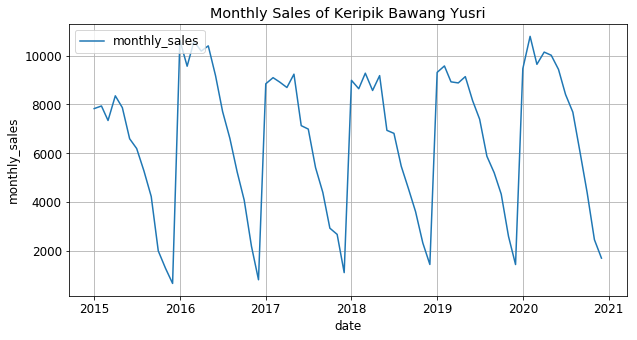

In [7]:
# plot monthly sales
plt.rc("font", size=12)
fig, ax = plt.subplots(figsize=(10,5))

# specify how our line should look like
ax.plot(df_monthly['date'], df_monthly['monthly_sales'], label="monthly_sales")

# same as above
ax.set_xlabel("date")
ax.set_ylabel("monthly_sales")
ax.set_title("Monthly Sales of {}".format(product["productName"]))
ax.grid(True)
ax.legend(loc="upper left")

### Data Preparation

In [8]:
def data_preparation(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)

In [9]:
data = df_monthly["monthly_sales"].values
print(data)

[ 7830  7936  7343  8352  7868  6597  6196  5280  4235  2010  1297   681
 10626  9562 10579 10181 10394  9174  7710  6613  5243  4089  2200   832
  8844  9094  8916  8692  9237  7132  6992  5417  4401  2940  2687  1124
  8985  8642  9277  8570  9178  6940  6817  5475  4549  3619  2335  1457
  9310  9573  8923  8879  9137  8156  7397  5881  5206  4331  2607  1454
  9462 10783  9639 10139 10011  9431  8406  7685  6032  4396  2470  1715]


In [10]:
dataset = data.reshape(-1,1)
print(dataset)

[[ 7830]
 [ 7936]
 [ 7343]
 [ 8352]
 [ 7868]
 [ 6597]
 [ 6196]
 [ 5280]
 [ 4235]
 [ 2010]
 [ 1297]
 [  681]
 [10626]
 [ 9562]
 [10579]
 [10181]
 [10394]
 [ 9174]
 [ 7710]
 [ 6613]
 [ 5243]
 [ 4089]
 [ 2200]
 [  832]
 [ 8844]
 [ 9094]
 [ 8916]
 [ 8692]
 [ 9237]
 [ 7132]
 [ 6992]
 [ 5417]
 [ 4401]
 [ 2940]
 [ 2687]
 [ 1124]
 [ 8985]
 [ 8642]
 [ 9277]
 [ 8570]
 [ 9178]
 [ 6940]
 [ 6817]
 [ 5475]
 [ 4549]
 [ 3619]
 [ 2335]
 [ 1457]
 [ 9310]
 [ 9573]
 [ 8923]
 [ 8879]
 [ 9137]
 [ 8156]
 [ 7397]
 [ 5881]
 [ 5206]
 [ 4331]
 [ 2607]
 [ 1454]
 [ 9462]
 [10783]
 [ 9639]
 [10139]
 [10011]
 [ 9431]
 [ 8406]
 [ 7685]
 [ 6032]
 [ 4396]
 [ 2470]
 [ 1715]]


#### Data Transformation (Normalize)

In [11]:
x_transformer = MinMaxScaler()
x_transformer.fit(dataset)

# difference transform
x_data_transformed = x_transformer.transform(dataset)
x_data_transformed = list(x_data_transformed.reshape(dataset.shape[0],))

# invert difference
# x_data_transformed = np.array(x_data_transformed).reshape(-1,1)
# print(x_data_transformed)
# x_inverted = x_transformer.inverse_transform(x_data_transformed)
# x_inverted = x_inverted.reshape(29,)
# output_inverted = [math.ceil(i) for i in x_inverted]
# print(output_inverted)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
print(x_data_transformed)

[0.7076816471985745, 0.718174618887349, 0.6594733716095823, 0.7593545832508414, 0.7114432785587013, 0.5856266085923579, 0.5459314987131261, 0.4552563848742823, 0.3518115224707979, 0.13155810730548406, 0.060978024153632945, 0.0, 0.9844585230647397, 0.8791328449811918, 0.9798059790140566, 0.940407840031677, 0.9614927737081765, 0.8407246089883191, 0.6958028113244902, 0.5872104533755692, 0.45159374381310635, 0.33735893882399526, 0.1503662641061176, 0.014947535141556126, 0.8080578103345872, 0.8328053850722629, 0.8151851118590379, 0.7930112848940803, 0.8469609978222135, 0.638586418530984, 0.6247277766778856, 0.4688180558305286, 0.36824391209661456, 0.2236190853296377, 0.1985745396951099, 0.04385270243516136, 0.8220154424866363, 0.7880617699465452, 0.8509206097802415, 0.7809344684220947, 0.841120570184122, 0.619580281132449, 0.6074044743615126, 0.4745594931696694, 0.38289447634131857, 0.29083349831716493, 0.16372995446446248, 0.07681647198574539, 0.8541872896456147, 0.8802217382696496, 0.8158

In [13]:
# choose a number of time steps
n_steps_in, n_steps_out = 6, 6

# split into samples
X, y = data_preparation(x_data_transformed, n_steps_in, n_steps_out)

In [14]:
print(X)

[[0.70768165 0.71817462 0.65947337 0.75935458 0.71144328 0.58562661]
 [0.71817462 0.65947337 0.75935458 0.71144328 0.58562661 0.5459315 ]
 [0.65947337 0.75935458 0.71144328 0.58562661 0.5459315  0.45525638]
 [0.75935458 0.71144328 0.58562661 0.5459315  0.45525638 0.35181152]
 [0.71144328 0.58562661 0.5459315  0.45525638 0.35181152 0.13155811]
 [0.58562661 0.5459315  0.45525638 0.35181152 0.13155811 0.06097802]
 [0.5459315  0.45525638 0.35181152 0.13155811 0.06097802 0.        ]
 [0.45525638 0.35181152 0.13155811 0.06097802 0.         0.98445852]
 [0.35181152 0.13155811 0.06097802 0.         0.98445852 0.87913284]
 [0.13155811 0.06097802 0.         0.98445852 0.87913284 0.97980598]
 [0.06097802 0.         0.98445852 0.87913284 0.97980598 0.94040784]
 [0.         0.98445852 0.87913284 0.97980598 0.94040784 0.96149277]
 [0.98445852 0.87913284 0.97980598 0.94040784 0.96149277 0.84072461]
 [0.87913284 0.97980598 0.94040784 0.96149277 0.84072461 0.69580281]
 [0.97980598 0.94040784 0.96149277

In [15]:
# for i in range(0, len(X)):
#     print(X[i], y[i])
print(y)

[[0.5459315  0.45525638 0.35181152 0.13155811 0.06097802 0.        ]
 [0.45525638 0.35181152 0.13155811 0.06097802 0.         0.98445852]
 [0.35181152 0.13155811 0.06097802 0.         0.98445852 0.87913284]
 [0.13155811 0.06097802 0.         0.98445852 0.87913284 0.97980598]
 [0.06097802 0.         0.98445852 0.87913284 0.97980598 0.94040784]
 [0.         0.98445852 0.87913284 0.97980598 0.94040784 0.96149277]
 [0.98445852 0.87913284 0.97980598 0.94040784 0.96149277 0.84072461]
 [0.87913284 0.97980598 0.94040784 0.96149277 0.84072461 0.69580281]
 [0.97980598 0.94040784 0.96149277 0.84072461 0.69580281 0.58721045]
 [0.94040784 0.96149277 0.84072461 0.69580281 0.58721045 0.45159374]
 [0.96149277 0.84072461 0.69580281 0.58721045 0.45159374 0.33735894]
 [0.84072461 0.69580281 0.58721045 0.45159374 0.33735894 0.15036626]
 [0.69580281 0.58721045 0.45159374 0.33735894 0.15036626 0.01494754]
 [0.58721045 0.45159374 0.33735894 0.15036626 0.01494754 0.80805781]
 [0.45159374 0.33735894 0.15036626

In [16]:
n_features = 1
n_steps = 6
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [17]:
print(X)

[[[0.70768165]
  [0.71817462]
  [0.65947337]
  [0.75935458]
  [0.71144328]
  [0.58562661]]

 [[0.71817462]
  [0.65947337]
  [0.75935458]
  [0.71144328]
  [0.58562661]
  [0.5459315 ]]

 [[0.65947337]
  [0.75935458]
  [0.71144328]
  [0.58562661]
  [0.5459315 ]
  [0.45525638]]

 [[0.75935458]
  [0.71144328]
  [0.58562661]
  [0.5459315 ]
  [0.45525638]
  [0.35181152]]

 [[0.71144328]
  [0.58562661]
  [0.5459315 ]
  [0.45525638]
  [0.35181152]
  [0.13155811]]

 [[0.58562661]
  [0.5459315 ]
  [0.45525638]
  [0.35181152]
  [0.13155811]
  [0.06097802]]

 [[0.5459315 ]
  [0.45525638]
  [0.35181152]
  [0.13155811]
  [0.06097802]
  [0.        ]]

 [[0.45525638]
  [0.35181152]
  [0.13155811]
  [0.06097802]
  [0.        ]
  [0.98445852]]

 [[0.35181152]
  [0.13155811]
  [0.06097802]
  [0.        ]
  [0.98445852]
  [0.87913284]]

 [[0.13155811]
  [0.06097802]
  [0.        ]
  [0.98445852]
  [0.87913284]
  [0.97980598]]

 [[0.06097802]
  [0.        ]
  [0.98445852]
  [0.87913284]
  [0.97980598]
  [0.

In [18]:
print(y)

[[0.5459315  0.45525638 0.35181152 0.13155811 0.06097802 0.        ]
 [0.45525638 0.35181152 0.13155811 0.06097802 0.         0.98445852]
 [0.35181152 0.13155811 0.06097802 0.         0.98445852 0.87913284]
 [0.13155811 0.06097802 0.         0.98445852 0.87913284 0.97980598]
 [0.06097802 0.         0.98445852 0.87913284 0.97980598 0.94040784]
 [0.         0.98445852 0.87913284 0.97980598 0.94040784 0.96149277]
 [0.98445852 0.87913284 0.97980598 0.94040784 0.96149277 0.84072461]
 [0.87913284 0.97980598 0.94040784 0.96149277 0.84072461 0.69580281]
 [0.97980598 0.94040784 0.96149277 0.84072461 0.69580281 0.58721045]
 [0.94040784 0.96149277 0.84072461 0.69580281 0.58721045 0.45159374]
 [0.96149277 0.84072461 0.69580281 0.58721045 0.45159374 0.33735894]
 [0.84072461 0.69580281 0.58721045 0.45159374 0.33735894 0.15036626]
 [0.69580281 0.58721045 0.45159374 0.33735894 0.15036626 0.01494754]
 [0.58721045 0.45159374 0.33735894 0.15036626 0.01494754 0.80805781]
 [0.45159374 0.33735894 0.15036626

### LSTM MODEL

In [19]:
# define model
from tensorflow.keras.layers import *
model = tf.keras.models.Sequential()
# model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(Bidirectional(LSTM(100, activation='relu', return_sequences=True), input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

In [20]:
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
61/61 [==============================] - 5s 85ms/sample - loss: 0.4365
Epoch 2/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.4130
Epoch 3/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.3873
Epoch 4/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.3575
Epoch 5/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.3211
Epoch 6/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.2790
Epoch 7/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.2328
Epoch 8/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.1962
Epoch 9/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.1732
Epoch 10/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.1784
Epoch 11/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.1677
Epoch 12/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.1492
Epoch 13/300

61/61 [==============================] - 0s 2ms/sample - loss: 0.0315
Epoch 100/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0313
Epoch 101/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0313
Epoch 102/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0310
Epoch 103/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0308
Epoch 104/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0304
Epoch 105/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0301
Epoch 106/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0300
Epoch 107/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0296
Epoch 108/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0293
Epoch 109/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0292
Epoch 110/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0288
Epoch 

61/61 [==============================] - 0s 1ms/sample - loss: 0.0183
Epoch 197/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0188
Epoch 198/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0183
Epoch 199/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0181
Epoch 200/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0181
Epoch 201/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0180
Epoch 202/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0180
Epoch 203/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0178
Epoch 204/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0179
Epoch 205/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0175
Epoch 206/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0176
Epoch 207/300
61/61 [==============================] - 0s 2ms/sample - loss: 0.0176
Epoch 

61/61 [==============================] - 0s 1ms/sample - loss: 0.0130
Epoch 294/300
61/61 [==============================] - 0s 2ms/sample - loss: 0.0127
Epoch 295/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0124
Epoch 296/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0124
Epoch 297/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0129
Epoch 298/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0132
Epoch 299/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0135
Epoch 300/300
61/61 [==============================] - 0s 1ms/sample - loss: 0.0123


## Exporting Model

In [ ]:
saved_model_path = "C:/Users/ASUS/BANGKIT/TokoLitik/mymodel.h5"

# save model
model.save(saved_model_path)

### TESTING DATA

In [ ]:
# print(data)

In [ ]:
total_data = len(data)
start_index = total_data - 12
end_index = total_data - 6

actual_data = list(data[start_index:end_index])
    
# check test input actual data by inverted it with MinMaxScaler
test_data = x_data_transformed[start_index:end_index]
test_data = np.array(test_data).reshape(-1,1)
x_inverted = x_transformer.inverse_transform(test_data)
x_inverted = x_inverted.reshape(6,)
output_inverted = [math.ceil(i) for i in x_inverted]


print("total data: ", total_data)
print("start data index: ", start_index)
print("end data index: ", end_index)
print()

print("actual input for test data: ", actual_data)
print("normalized input for test data: ", test_data)
print()
print("inverted input for test data: ", output_inverted)
print("expected predicted data: ", list(data[-6:]))


In [ ]:
# demonstrate testing
pred_shape = 6

x_input = test_data.reshape(pred_shape,)
print(x_input)
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)

# # invert difference
y_hat = np.array(yhat[0]).reshape(-1,1)
x_inverted = x_transformer.inverse_transform(yhat)
x_inverted = x_inverted.reshape(pred_shape)
output_inverted = [math.ceil(i) for i in x_inverted]


print("expected predicted data: ", list(data[-6:]))
print("predicted next 6 data from test data: ", output_inverted)


In [ ]:
get_months = df_monthly["date"][-6:].values
print(get_months)
create_data = {"date": get_months, "pred": output_inverted, "actual": df_monthly["monthly_sales"][-6:]}
df_result = pd.DataFrame(create_data)
df_result.head(6)

In [ ]:
plt.rc("font", size=12)
fig, ax = plt.subplots(figsize=(10,5))

# specify how our line should look like
ax.plot(df_result['date'], df_result['actual'], label="actual")
ax.plot(df_result['date'], df_result['pred'], label="predicted")

# same as above
ax.set_xlabel("date")
ax.set_ylabel("sales")
ax.set_title("Sales Prediction")
ax.grid(True)
ax.legend(loc="upper left")

# Predict Next 6 Months

In [ ]:
pred_shape = 6 
pred_data = np.array(x_data_transformed[-6:])
pred_input = pred_data.reshape(pred_shape,)
pred_input = pred_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(pred_input, verbose=0)

# invert difference
y_hat = np.array(yhat[0]).reshape(-1,1)
x_inverted = x_transformer.inverse_transform(yhat)
x_inverted = x_inverted.reshape(pred_shape)
pred_output = [math.ceil(i) for i in x_inverted]


print("predicted next 6 months: ", pred_output)

### Next 6 Months  Data

In [ ]:
import dateutil

last_month = df_monthly["date"][-1:].values[0]
last_month = np.datetime64(last_month)
last_month = pd.to_datetime(last_month)
date = last_month.date()

delta = dateutil.relativedelta.relativedelta(months=7)
next_6_months = date + delta

print(next_6_months)

In [ ]:
months = np.arange(date, next_6_months, dtype='datetime64[M]')
next_6_months = []

for i in months:
    next_6_months.append(str(i)+'-01')
next_6_months = next_6_months[1:]
print(next_6_months)

In [ ]:
get_pred_months = np.array(next_6_months)
create_df_pred = {"date": get_pred_months, "monthly_sales": pred_output}
df_pred_result = pd.DataFrame(create_df_pred)
df_pred_result["date"] = pd.to_datetime(df_pred_result["date"])
df_pred_result.head(6)

In [ ]:
mydataframe = df_monthly.append(df_pred_result, ignore_index=True)
mydataframe.tail(10)

In [ ]:
# df_sales_pred = pd.merge(df_monthly, df_result, on="date", how="left")

plt.rc("font", size=12)
fig, ax = plt.subplots(figsize=(10,5))

# specify how our line should look like
ax.plot(mydataframe['date'], mydataframe['monthly_sales'], label="sales")

# same as above
ax.set_xlabel("date")
ax.set_ylabel("sales")
ax.set_title("Sales Prediction (2021/01 - 2021/06)")
ax.grid(True)
ax.legend(loc="upper left")